### Trend Analysis Over Time (Yearly Patterns)
Goal: Understand how soil attributes (like pH, Carbon, Nitrogen) change over the years.<br>
Approach: Plot trends for each attribute over time to identify increasing, decreasing, or stable patterns.<br>
Purpose: This can reveal long-term soil health trends, helping inform future soil management decisions.

1. Import Necessary Libraries:

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

2. Load the Data:

In [8]:
file_path = 'kfdata.csv'
data = pd.read_csv(file_path)

3. Quick Data Check (EDA):

In [9]:
# Display first few rows
print(data.head())

   Year  Year05  Cluster Mgmt Property    Indicator Attribute      Value
0  2004      -1        2    A     KF2A  Soil status        pH   6.233333
1  2004      -1        2    A     KF2A  Soil status    OlsenP  48.333333
2  2004      -1        2    A     KF2A  Soil status       AMN  58.000000
3  2004      -1        2    A     KF2A  Soil status    Carbon   7.885000
4  2004      -1        2    A     KF2A  Soil status  Nitrogen   0.676667


In [10]:
# Check for missing values
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1170 entries, 0 to 1169
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Year       1170 non-null   int64  
 1   Year05     1170 non-null   int64  
 2   Cluster    1170 non-null   int64  
 3   Mgmt       1170 non-null   object 
 4   Property   1170 non-null   object 
 5   Indicator  1170 non-null   object 
 6   Attribute  1170 non-null   object 
 7   Value      1170 non-null   float64
dtypes: float64(1), int64(3), object(4)
memory usage: 73.2+ KB
None


In [11]:
# Check unique attributes
print(data['Attribute'].unique())

['pH' 'OlsenP' 'AMN' 'Carbon' 'Nitrogen' 'BulkDensity' 'intro_all'
 'intro_insectivore' 'intro_granivorous' 'native' 'native_insectivore'
 'native_nectar' 'pests']


4. Data Preparation (Pivot for Analysis):<br>
Reshape the data so that attributes (like pH, Carbon, etc.) are columns, and each row corresponds to a year.

In [12]:
# Pivot table for better visualization
pivot_data = data.pivot_table(values='Value', 
                              index='Year', 
                              columns='Attribute', 
                              aggfunc='mean').reset_index()
print(pivot_data.head())

Attribute  Year        AMN  BulkDensity    Carbon  Nitrogen     OlsenP  \
0          2004  58.405556     0.756778  5.472939  0.452679  50.550000   
1          2005        NaN          NaN       NaN       NaN        NaN   
2          2006  60.438889     0.754111  5.481556  0.480500  60.108889   
3          2007        NaN          NaN       NaN       NaN        NaN   
4          2009  62.100000     0.723111  6.057444  0.521722  65.127778   

Attribute  intro_all  intro_granivorous  intro_insectivore    native  \
0                NaN                NaN                NaN       NaN   
1          21.045939           8.628368          12.143445  1.634054   
2                NaN                NaN                NaN       NaN   
3          19.574969           8.103833          11.230401  1.721794   
4                NaN                NaN                NaN       NaN   

Attribute  native_insectivore  native_nectar        pH     pests  
0                         NaN            NaN  6.544444 

5. Plotting Trends for Each Attribute:

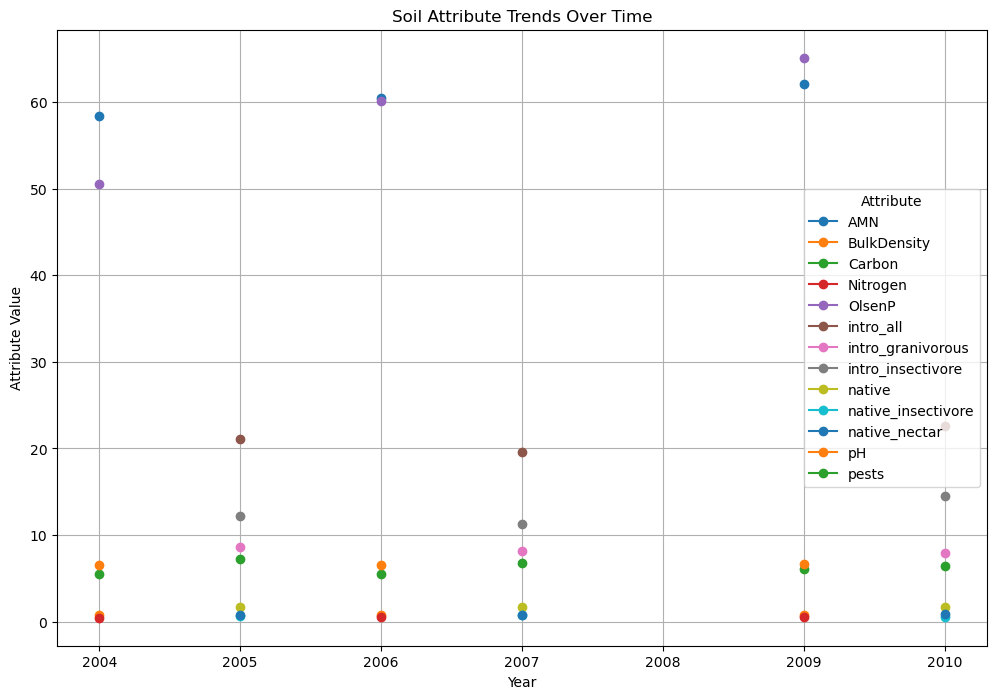

In [13]:
plt.figure(figsize=(12, 8))
for column in pivot_data.columns[1:]:
    plt.plot(pivot_data['Year'], pivot_data[column], label=column, marker='o')

plt.title('Soil Attribute Trends Over Time')
plt.xlabel('Year')
plt.ylabel('Attribute Value')
plt.legend(title='Attribute')
plt.grid(True)
plt.show()

6. Detailed Individual Plots for Each Attribute:

In [14]:
# Ensuring attributes is correct: Before looping, checking the actual column names:
print(pivot_data.columns)

Index(['Year', 'AMN', 'BulkDensity', 'Carbon', 'Nitrogen', 'OlsenP',
       'intro_all', 'intro_granivorous', 'intro_insectivore', 'native',
       'native_insectivore', 'native_nectar', 'pH', 'pests'],
      dtype='object', name='Attribute')


In [15]:
pivot_data.columns = pivot_data.columns.str.strip()

In [16]:
attributes = [col for col in pivot_data.columns if col != 'Year']
print(attributes)

['AMN', 'BulkDensity', 'Carbon', 'Nitrogen', 'OlsenP', 'intro_all', 'intro_granivorous', 'intro_insectivore', 'native', 'native_insectivore', 'native_nectar', 'pH', 'pests']


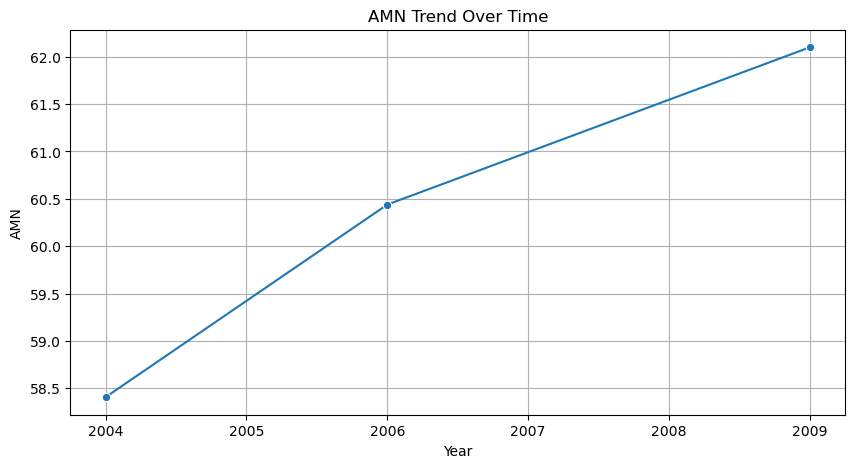

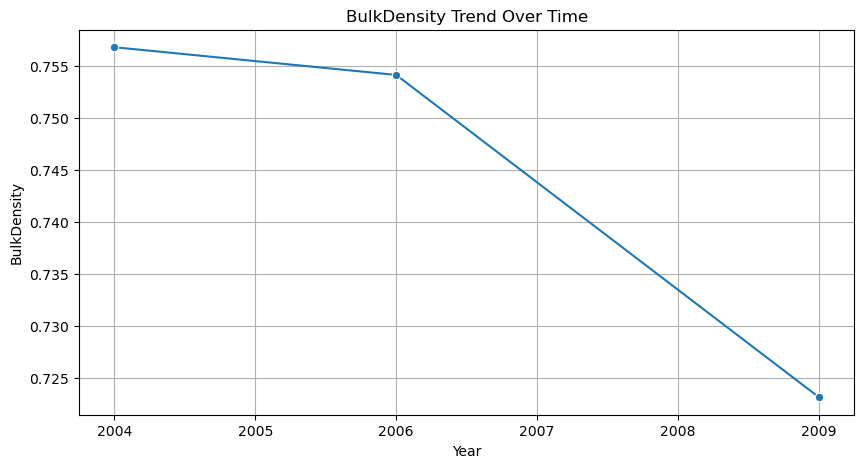

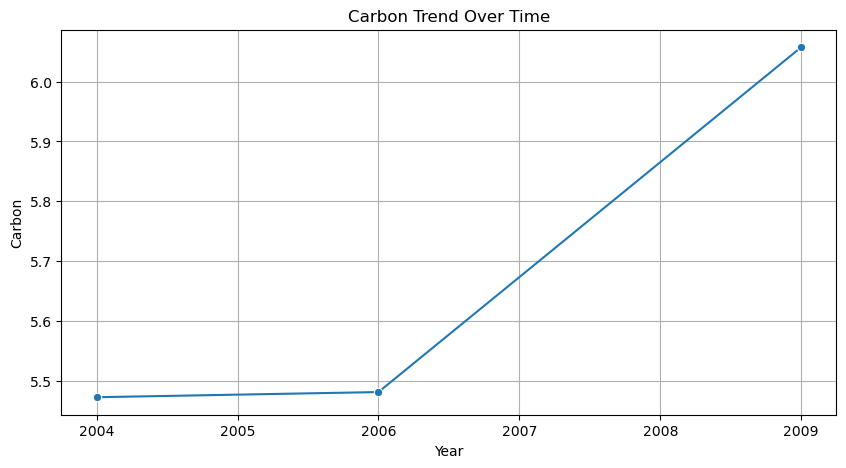

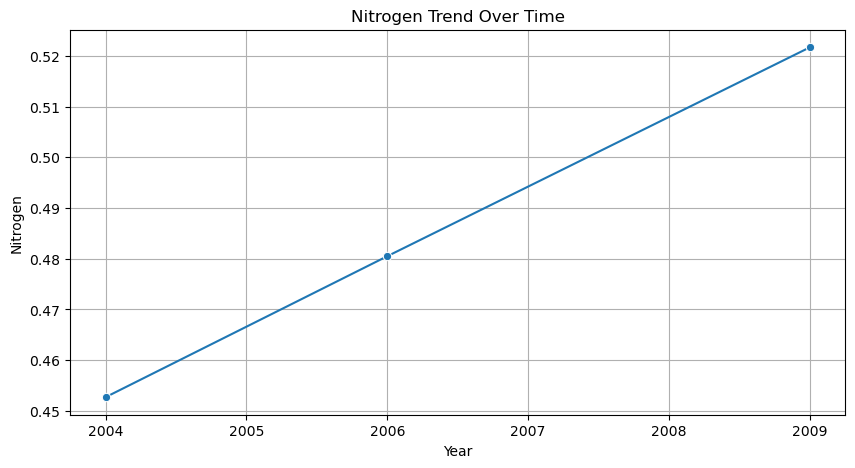

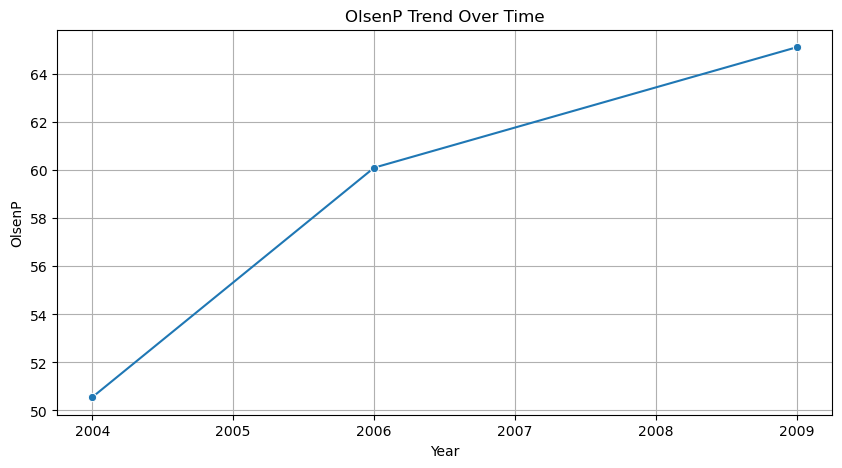

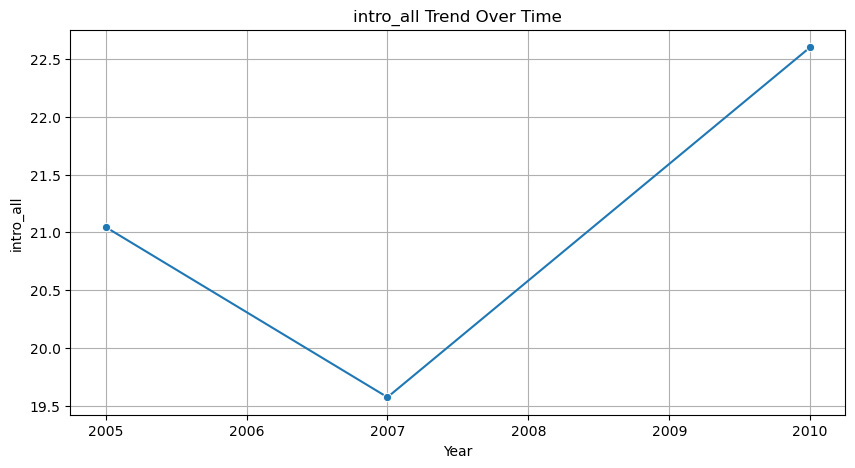

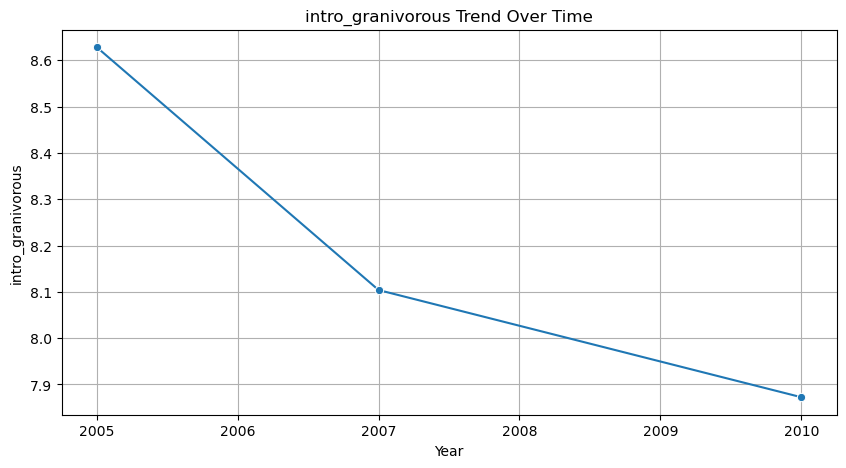

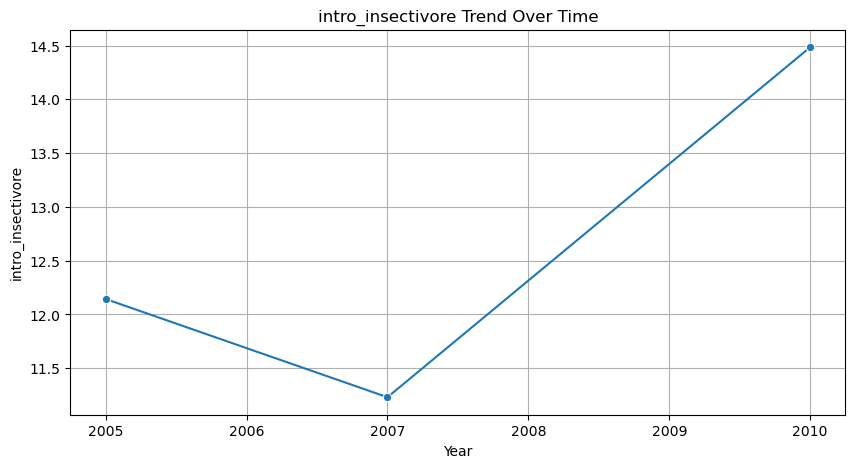

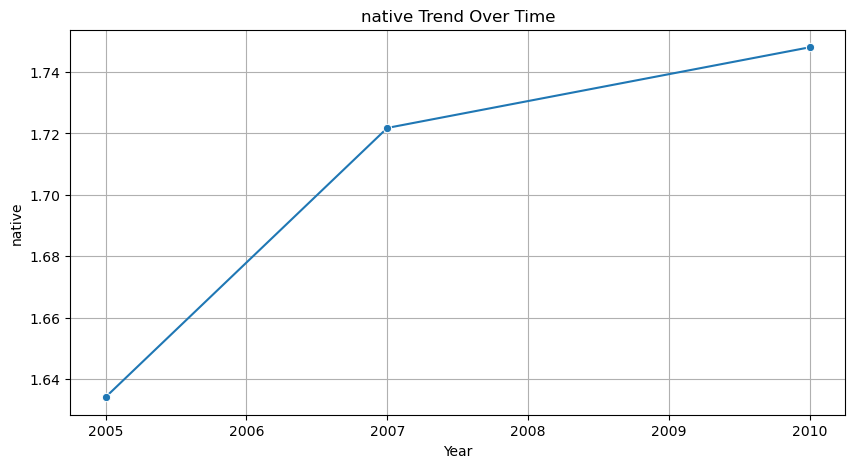

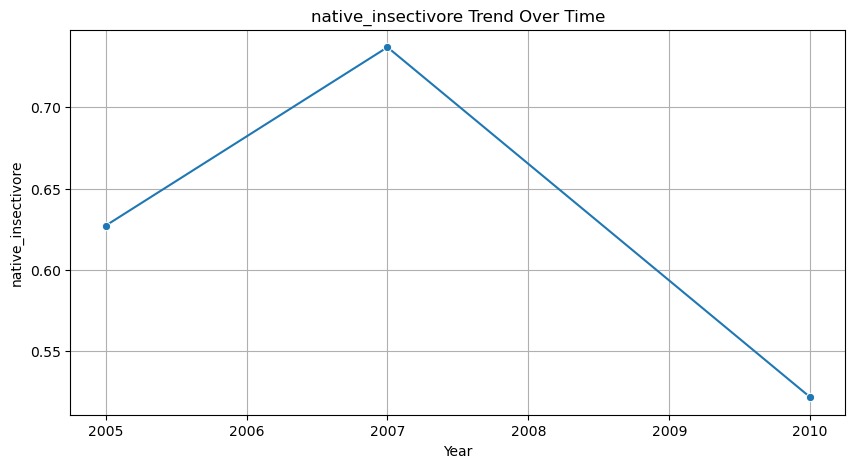

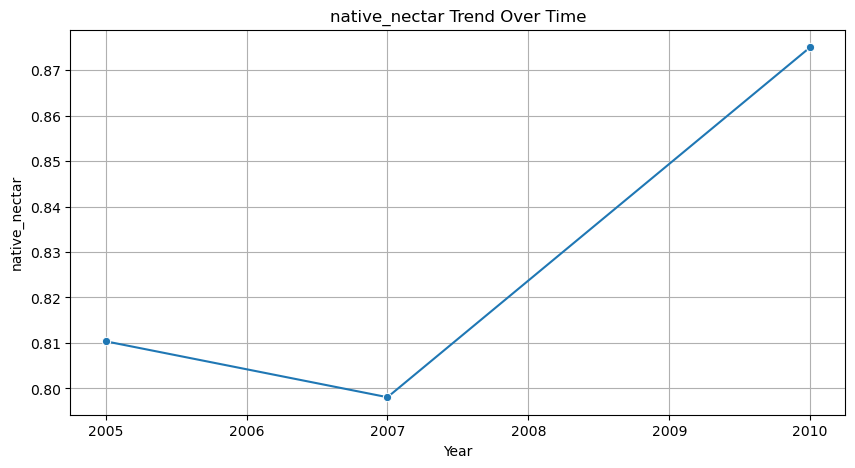

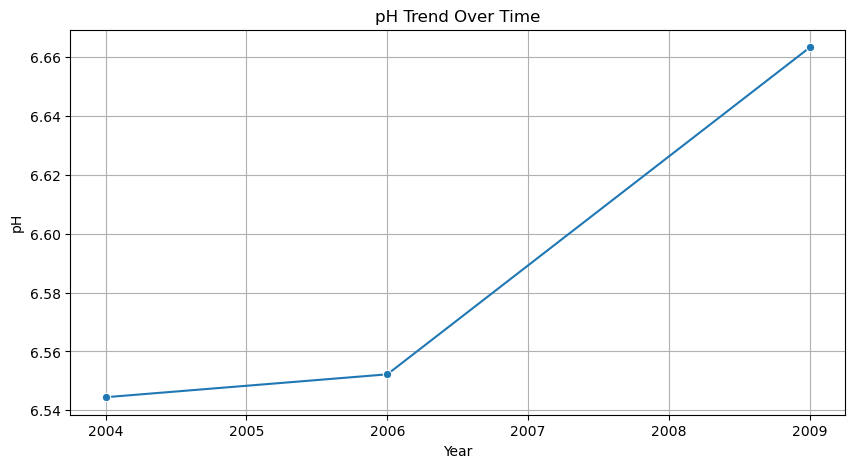

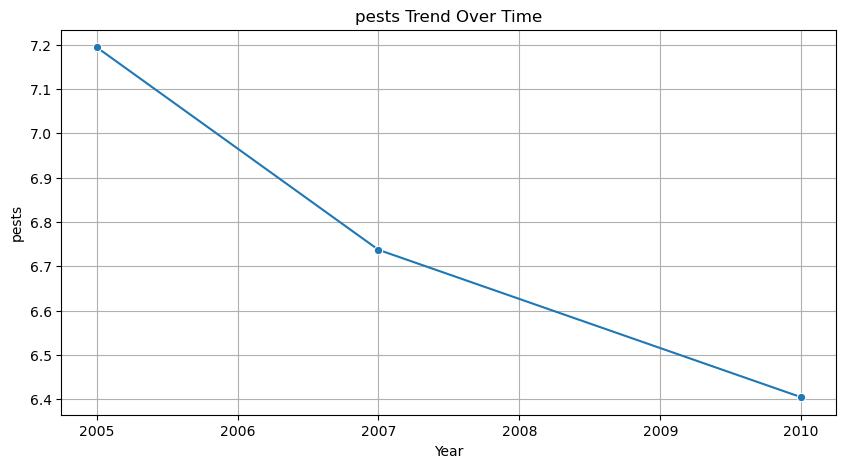

In [17]:
attributes = list(pivot_data.columns[1:])

for attribute in attributes:
    if attribute in pivot_data.columns:
        plt.figure(figsize=(10, 5))
        sns.lineplot(x='Year', y=attribute, data=pivot_data, marker='o')
        plt.title(f'{attribute} Trend Over Time')
        plt.xlabel('Year')
        plt.ylabel(attribute)
        plt.grid(True)
        plt.show()
    else:
        print(f"Attribute {attribute} not found in pivot_data.")


7. Identify Patterns:<br>
Increasing Trend: Attributes like Carbon or Nitrogen might show upward trends.<br>
Decreasing Trend: pH levels might drop over time.<br>
Stable Trend: Attributes with little variation might indicate consistency.

8. Rolling Average (Smoothing Trends): <br>
Key Insights to Look For:<br.
Identify Peaks and Valleys – Significant changes year over year.<br>
Long-Term Trends – Gradual increases or decreases.<br>
Volatility – Large fluctuations could indicate environmental or operational changes.


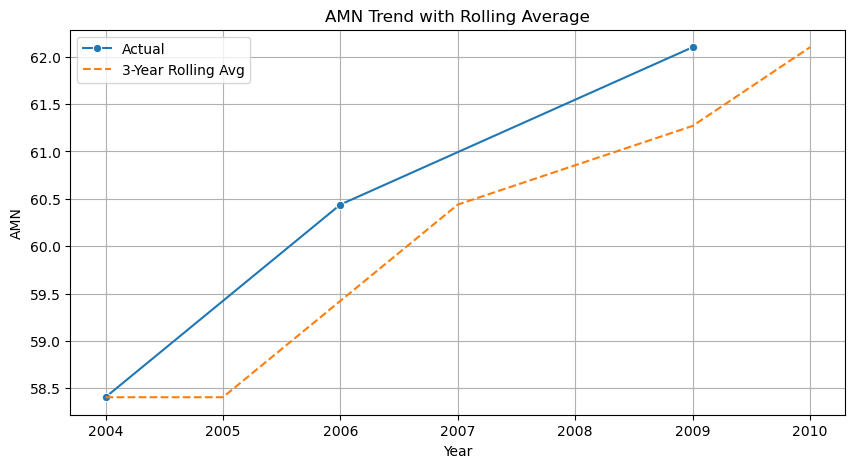

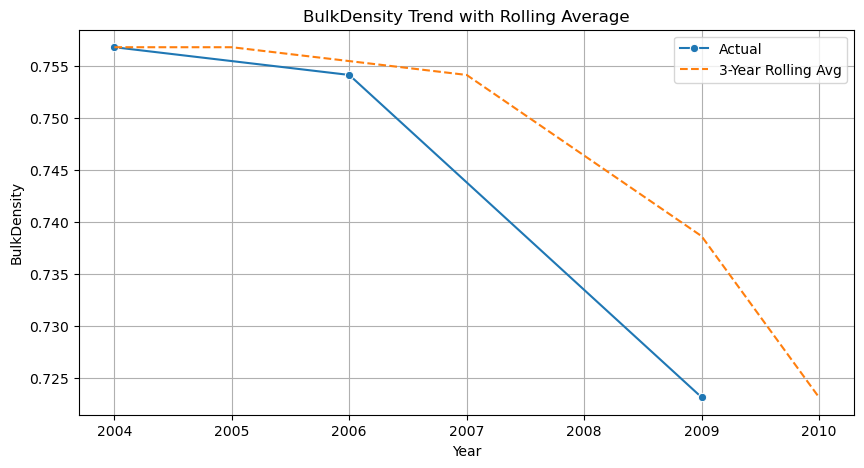

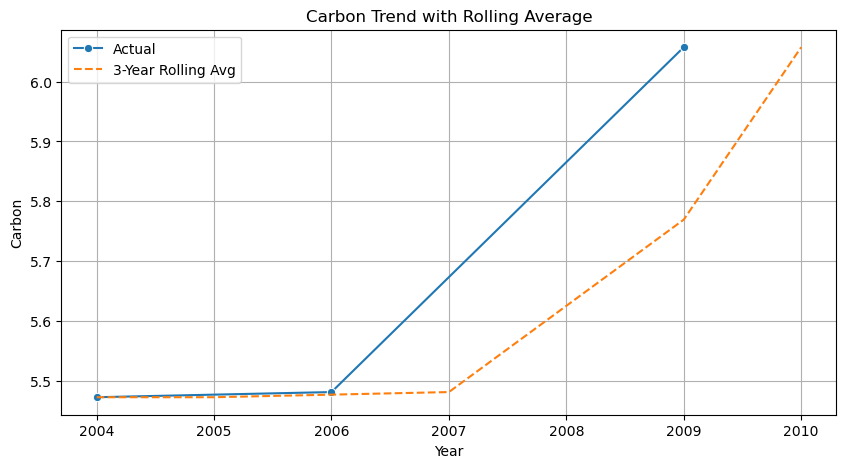

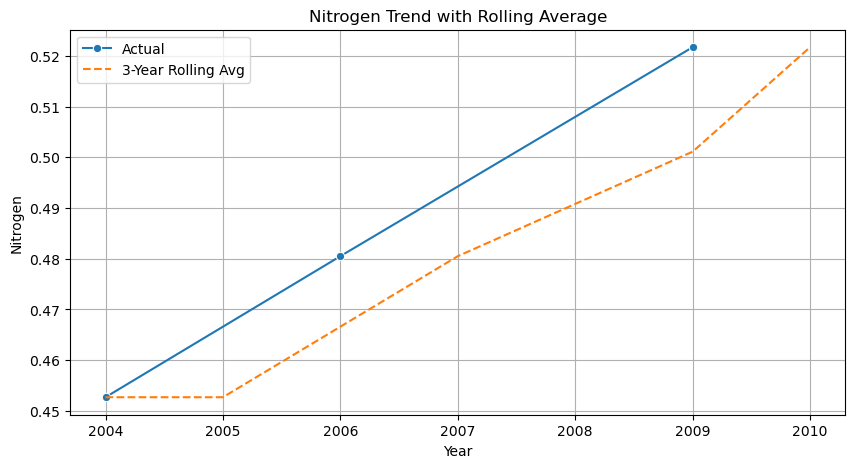

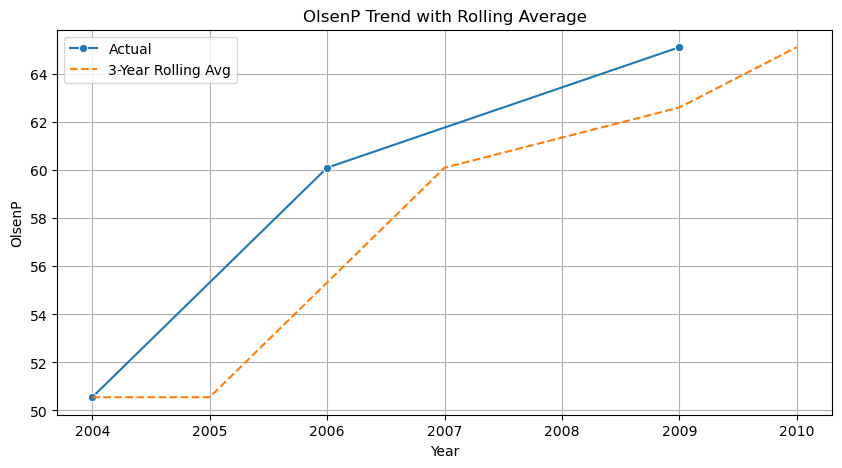

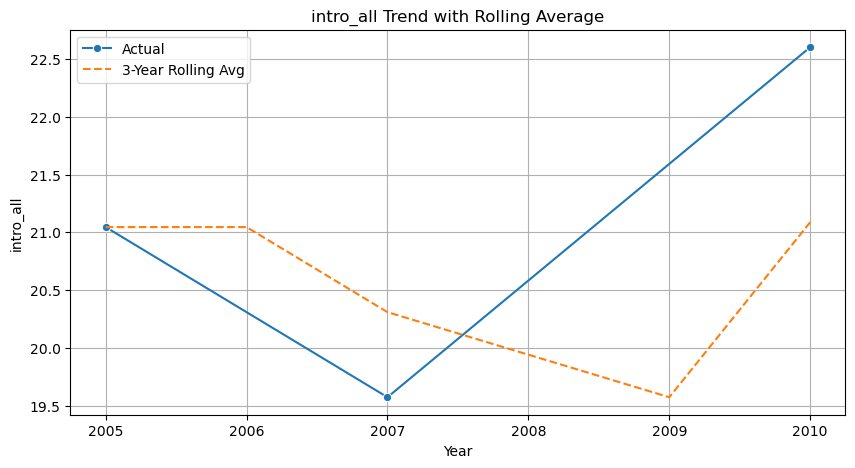

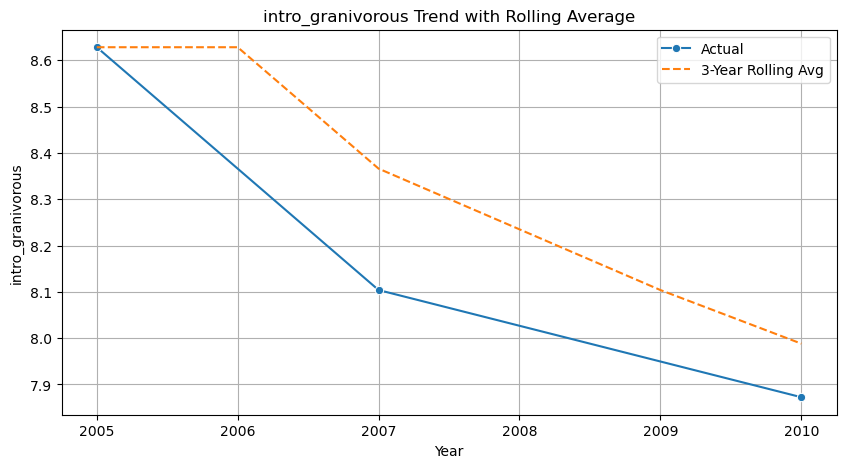

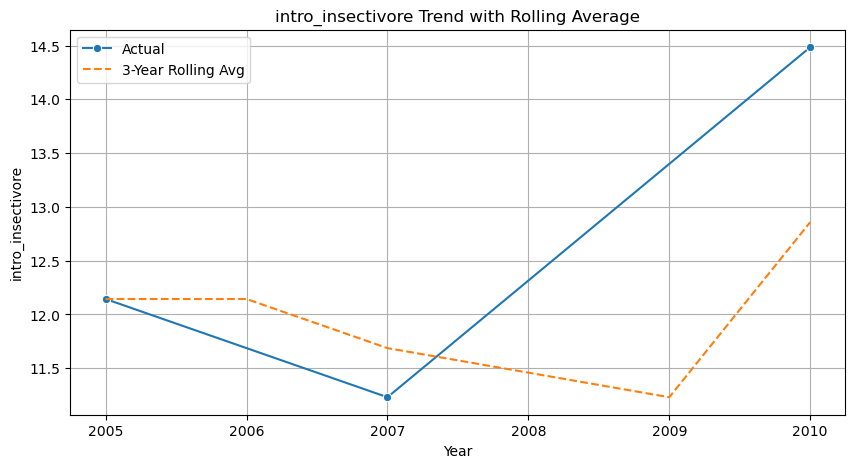

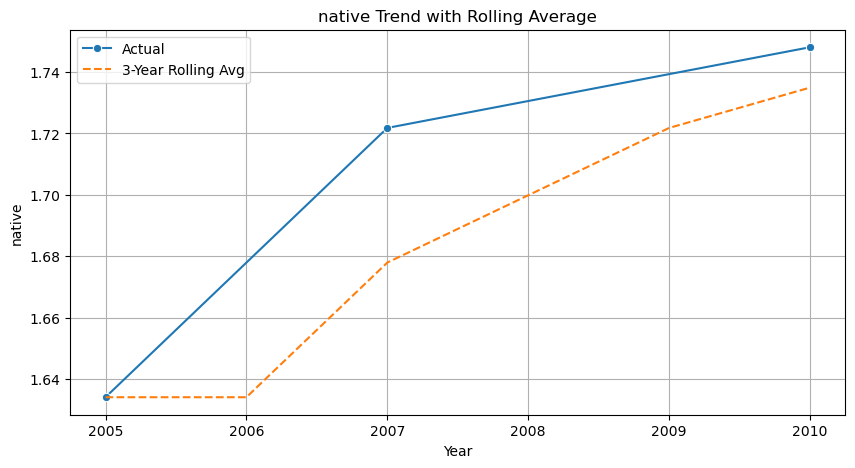

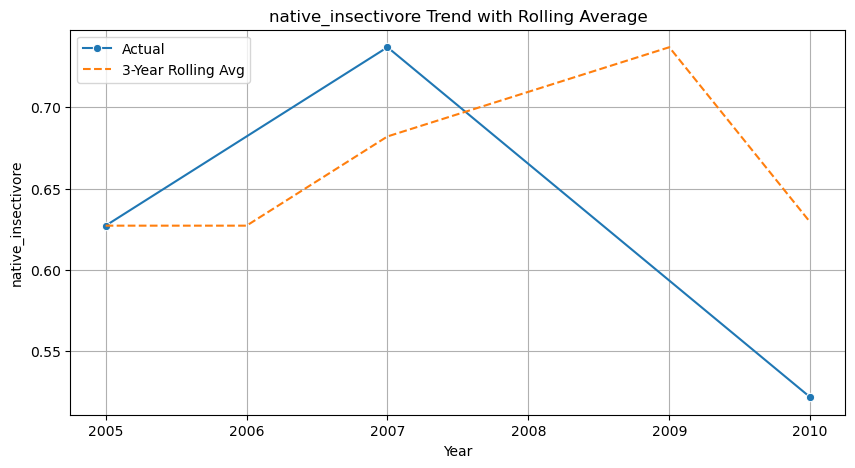

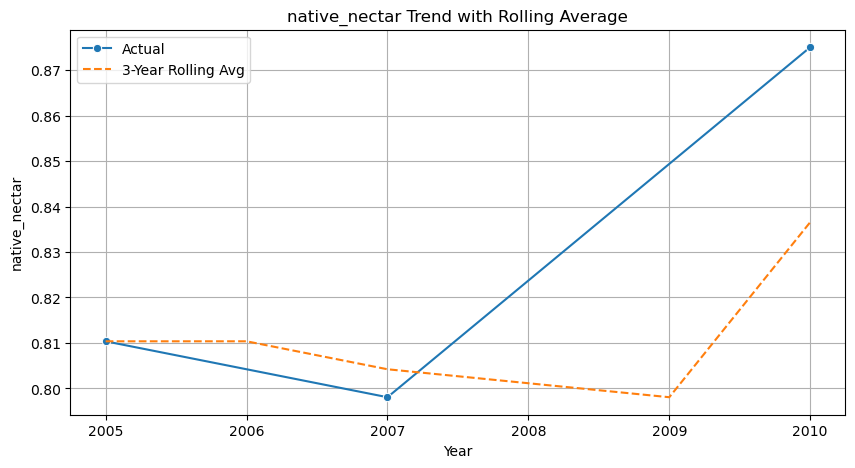

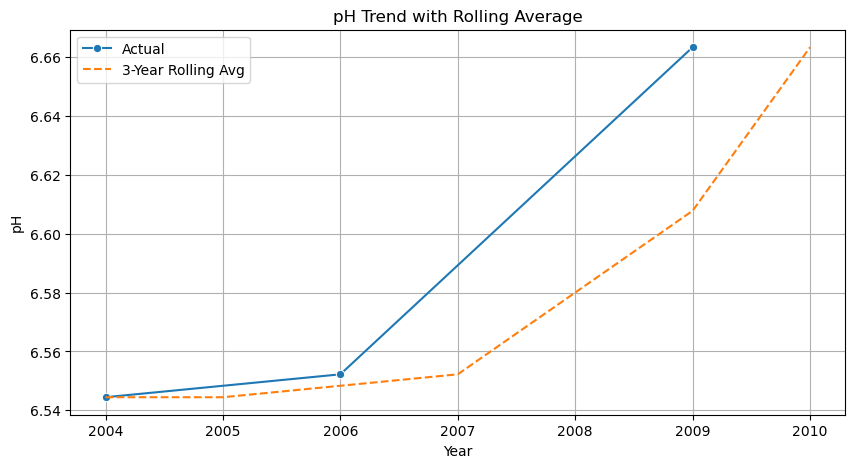

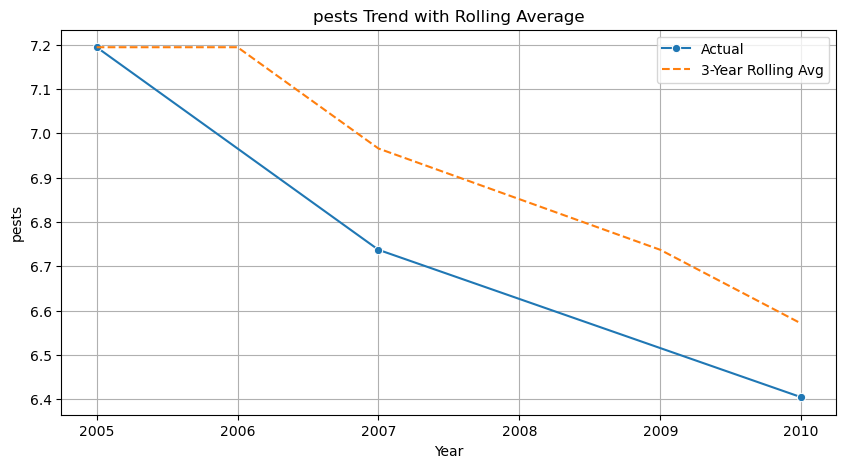

In [18]:
for attribute in attributes:
    plt.figure(figsize=(10, 5))
    if attribute in pivot_data.columns:
        pivot_data[f'{attribute}_rolling'] = pivot_data[attribute].rolling(window=3, min_periods=1).mean()
        sns.lineplot(x='Year', y=attribute, data=pivot_data, label='Actual', marker='o')
        sns.lineplot(x='Year', y=f'{attribute}_rolling', data=pivot_data, label='3-Year Rolling Avg', linestyle='--')
        plt.title(f'{attribute} Trend with Rolling Average')
        plt.xlabel('Year')
        plt.ylabel(attribute)
        plt.grid(True)
        plt.show()
    else:
        print(f"Attribute {attribute} not found in data.")


Summary of the results:<br>
Overall Trends – The first plot shows how each soil attribute (like pH, Carbon, Nitrogen, etc.) evolves over the years.<br>
Individual Attribute Trends – Each attribute is plotted separately, with a rolling average (3-year) overlaid to smooth out short-term fluctuations and highlight long-term patterns.<br><br>
Key Observations to Look For:<br>
Rising or Falling Attributes – Consistent upward or downward trends for attributes like pH, Carbon, or Nitrogen.<br>
Volatility – Some attributes might show large fluctuations year to year.<br>
Stability – Certain attributes may remain relatively constant over time.

### Distribution analysis:
The distributions for each soil attribute visualized using histograms. These plots show how the values for attributes like pH, Carbon, Nitrogen, and others are distributed over time.<br><br>
Key Insights to Look For:<br>
Symmetry – Attributes with symmetric distributions may indicate consistent soil conditions.<br>
Skewness – A skewed distribution could point to irregularities or outliers in the data.<br>
Multimodal Distributions – Peaks at different points suggest variability across years or clusters.<br>
Narrow vs. Wide Spread – Attributes with a narrow spread show less variability, while wide spreads indicate fluctuating values.

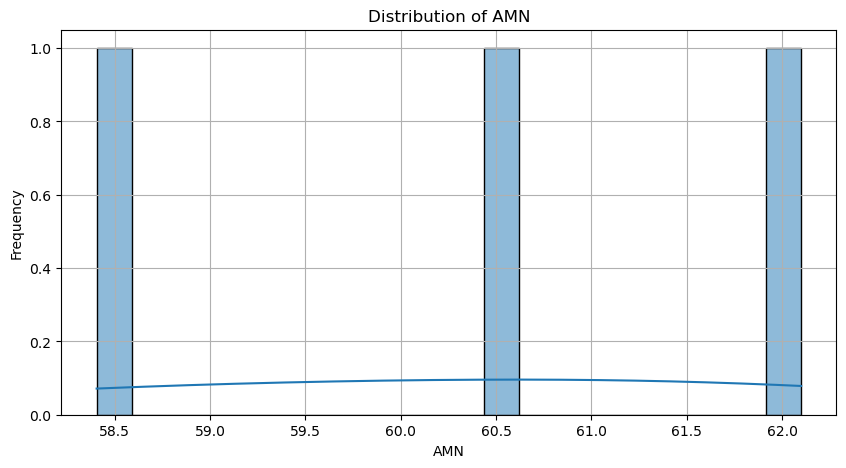

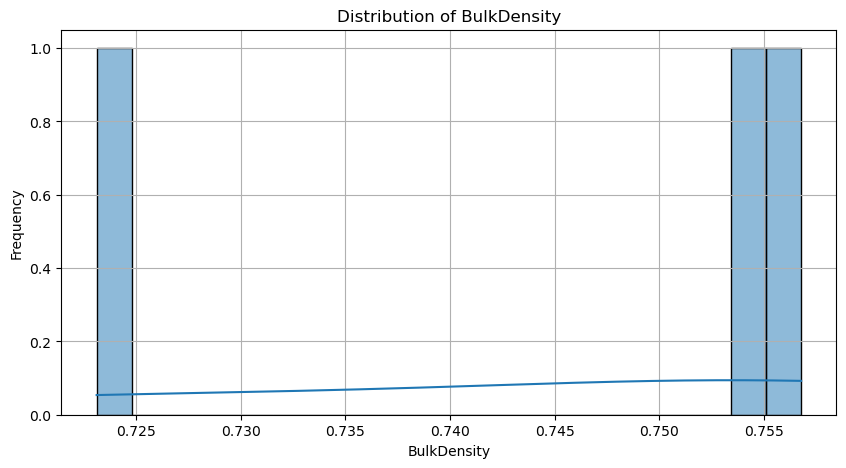

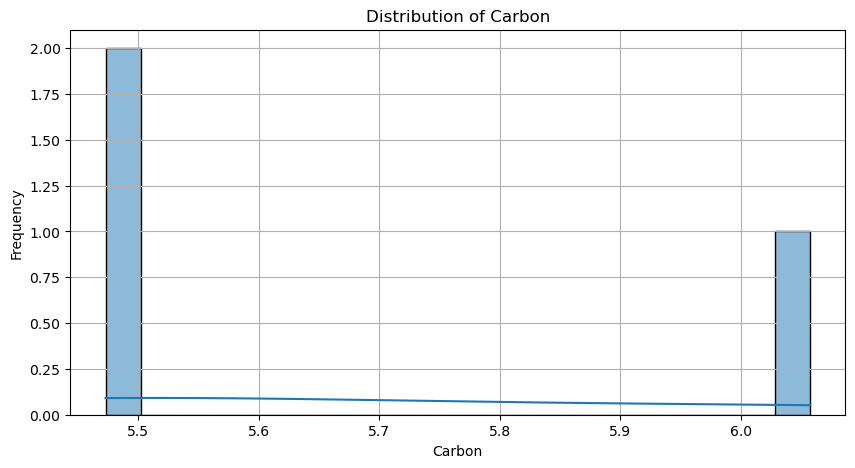

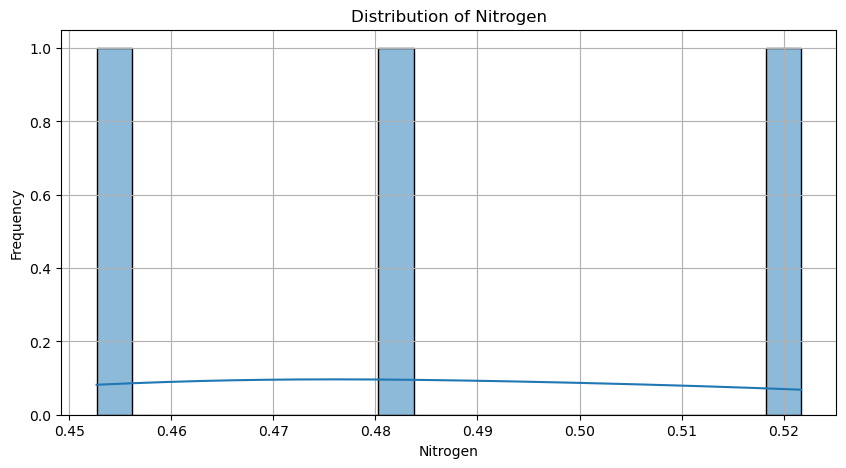

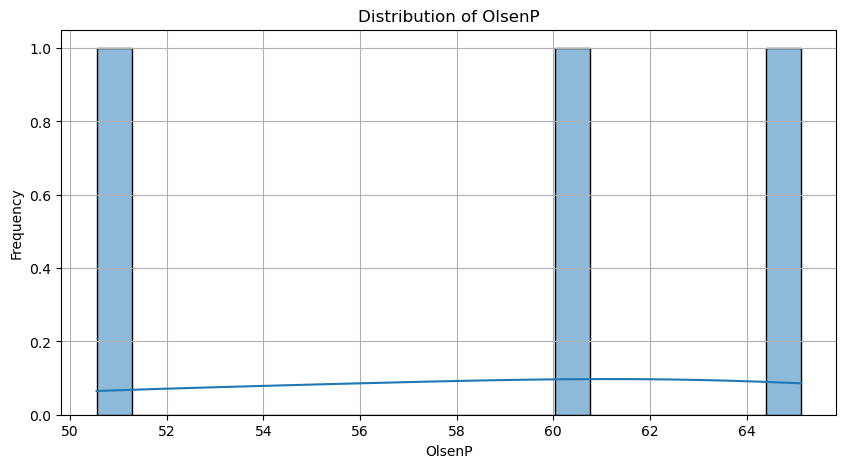

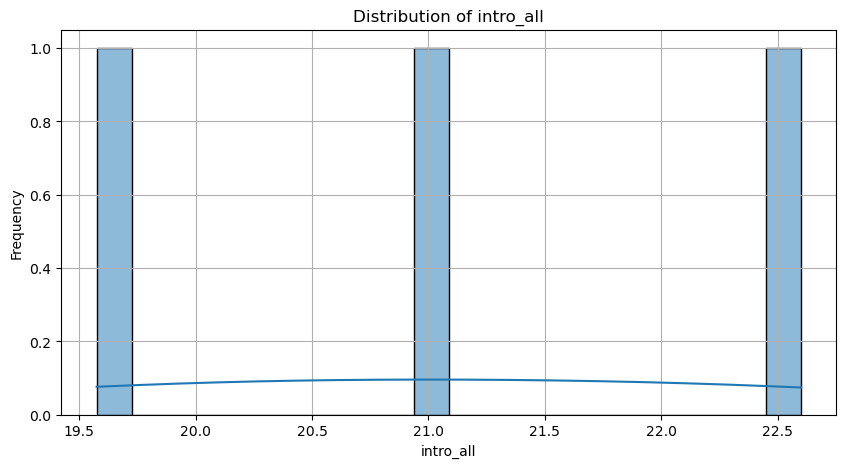

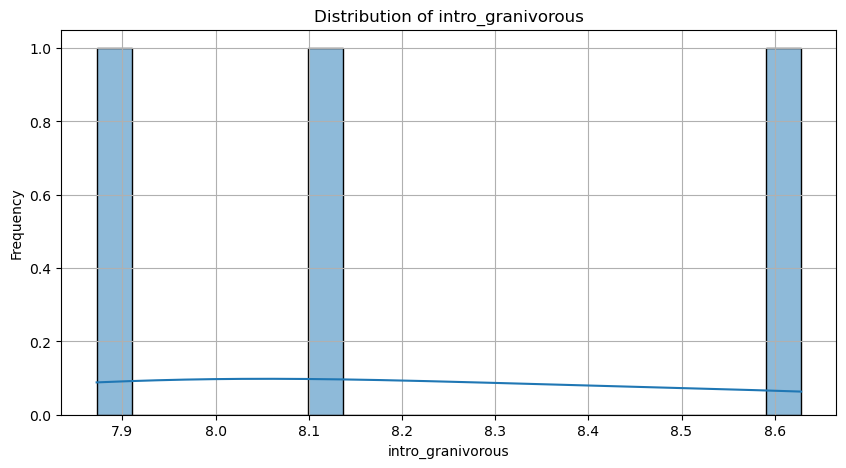

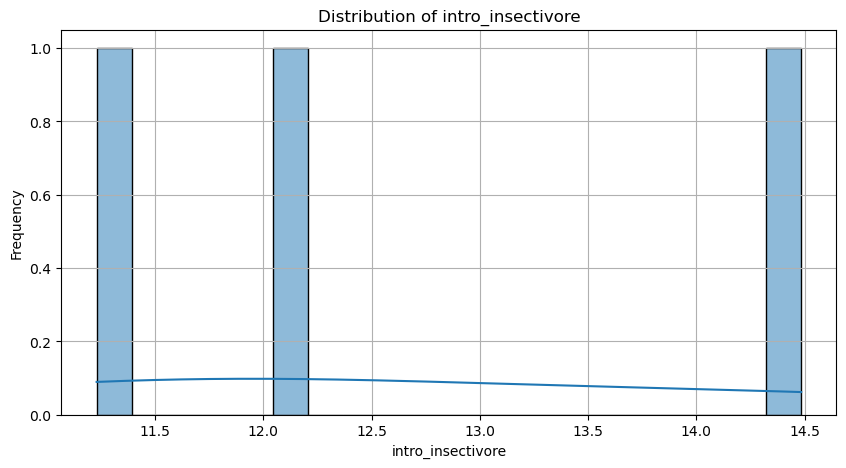

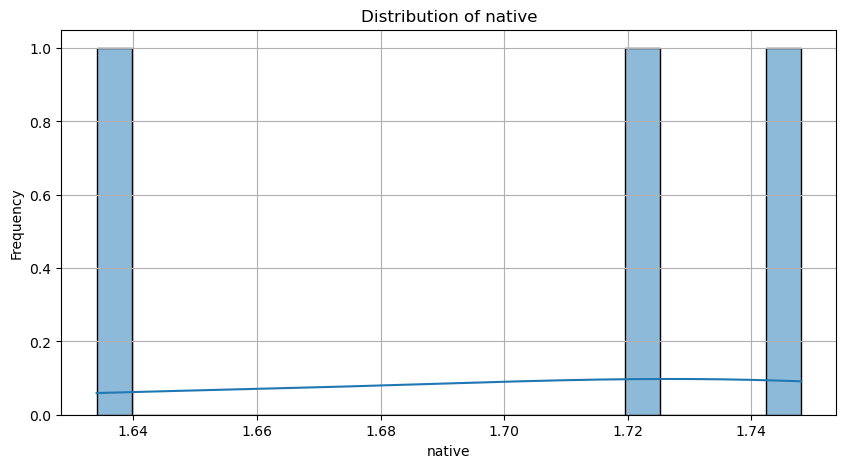

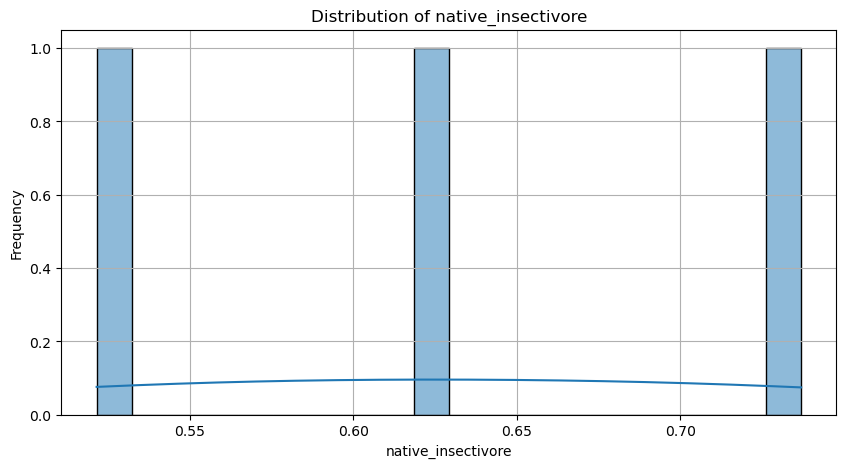

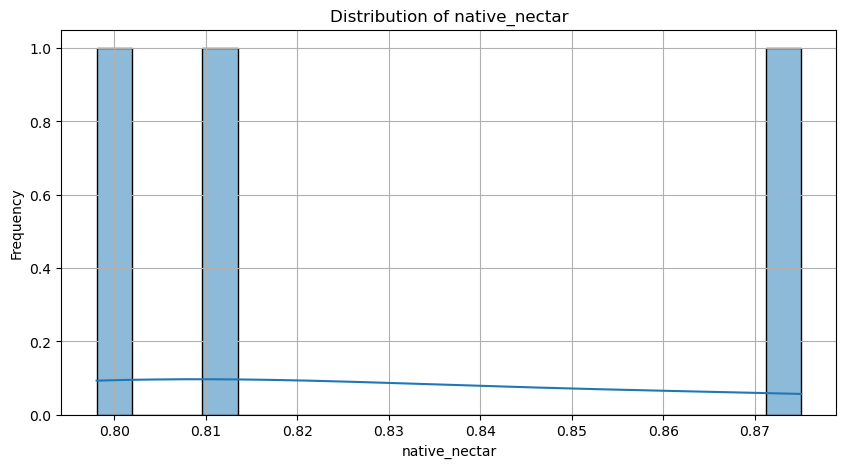

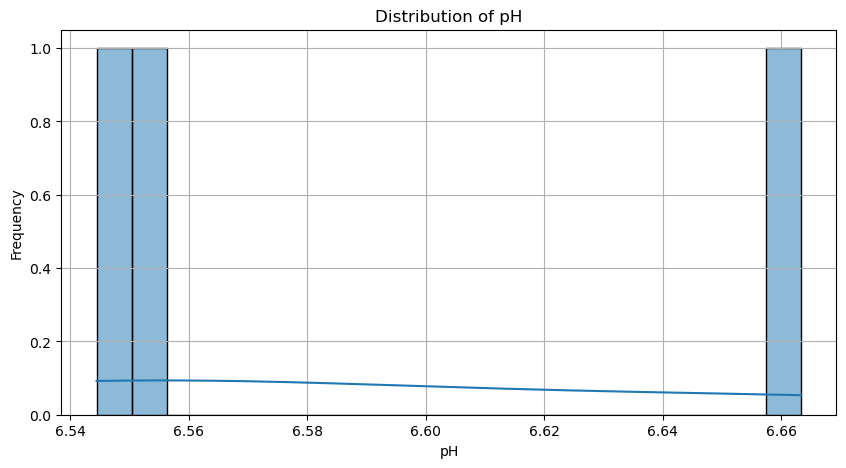

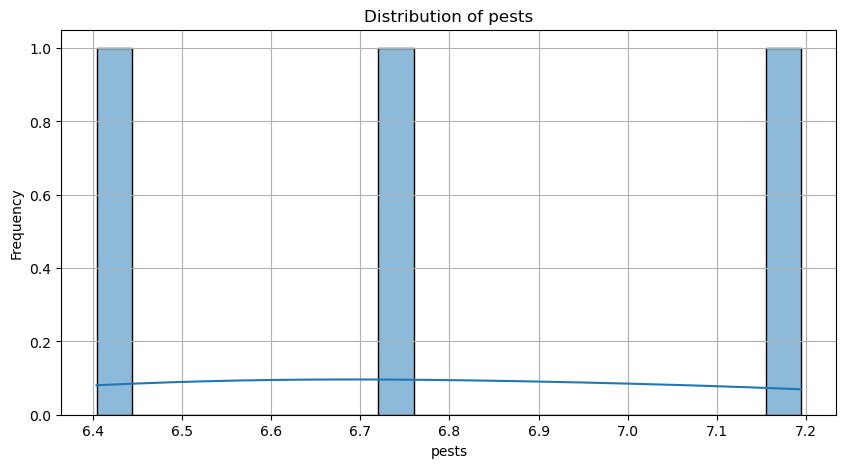

In [19]:
# Re-import necessary libraries and reload the data
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
file_path = 'kfdata.csv'
data = pd.read_csv(file_path)

# Pivot data for analysis
pivot_data = data.pivot_table(values='Value', 
                              index='Year', 
                              columns='Attribute', 
                              aggfunc='mean').reset_index()

# Plot histograms for each attribute to show data distributions
attributes = [col for col in pivot_data.columns if col != 'Year']

for attribute in attributes:
    plt.figure(figsize=(10, 5))
    sns.histplot(pivot_data[attribute], bins=20, kde=True)
    plt.title(f'Distribution of {attribute}')
    plt.xlabel(attribute)
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.show()


Analysis of the attributes pH, Carbon, and Nitrogen:

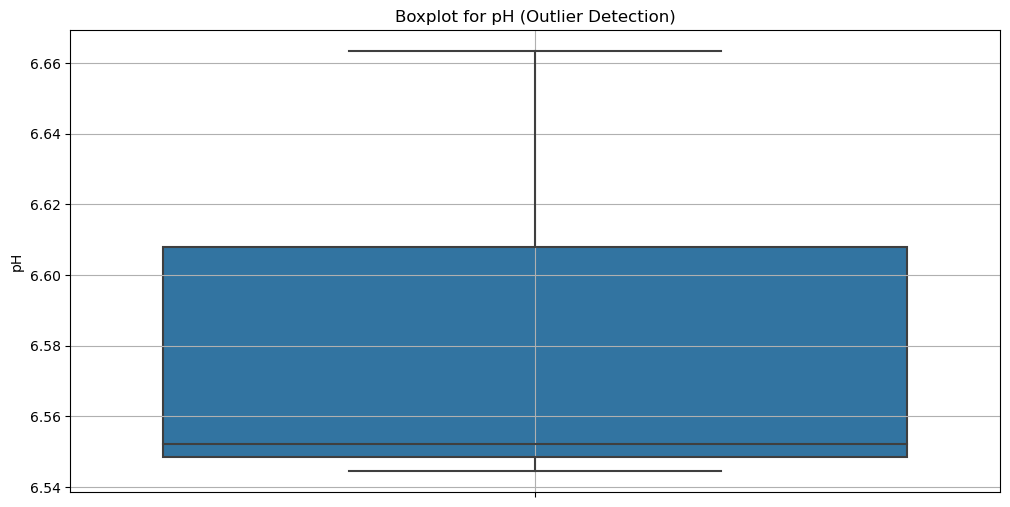

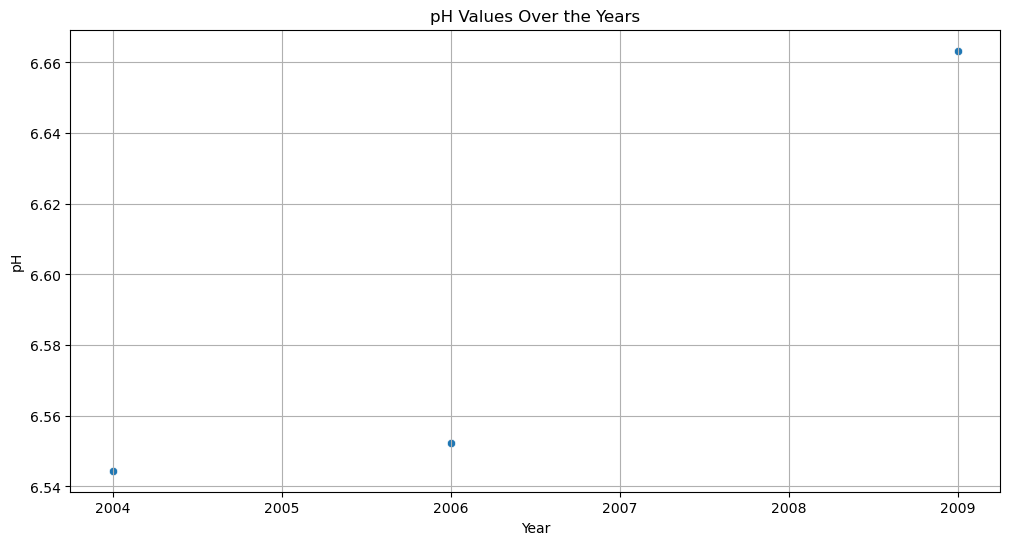

Summary statistics for pH:
count    3.000000
mean     6.586667
std      0.066509
min      6.544444
25%      6.548333
50%      6.552222
75%      6.607778
max      6.663333
Name: pH, dtype: float64



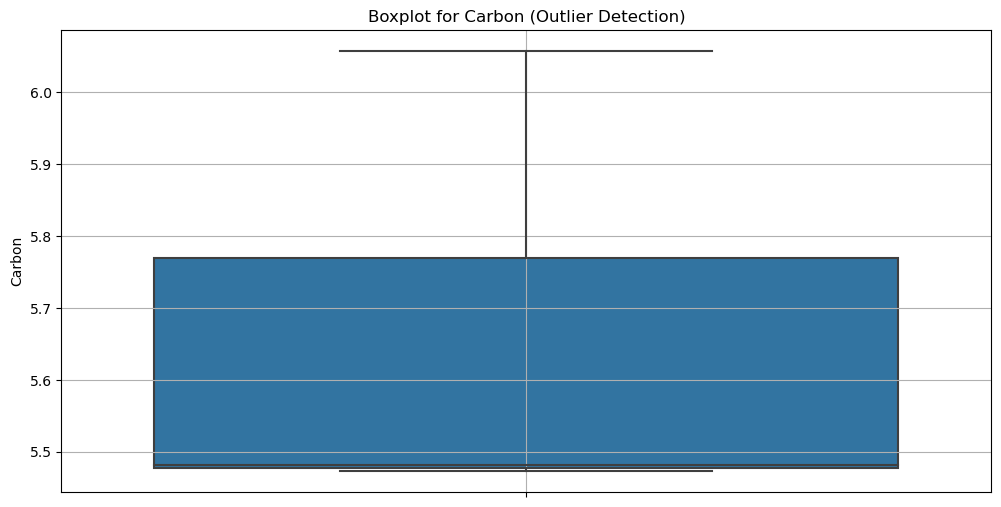

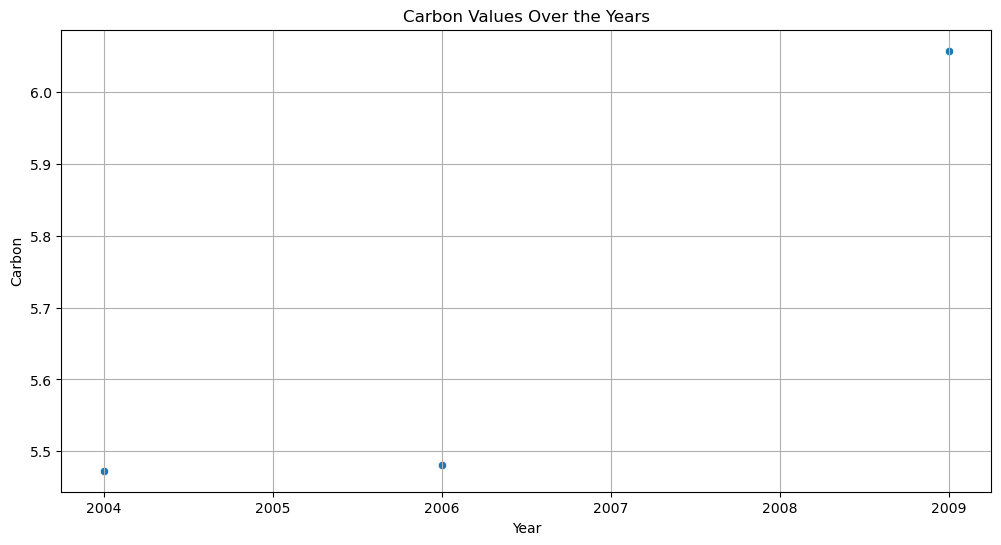

Summary statistics for Carbon:
count    3.000000
mean     5.670646
std      0.335005
min      5.472939
25%      5.477247
50%      5.481556
75%      5.769500
max      6.057444
Name: Carbon, dtype: float64



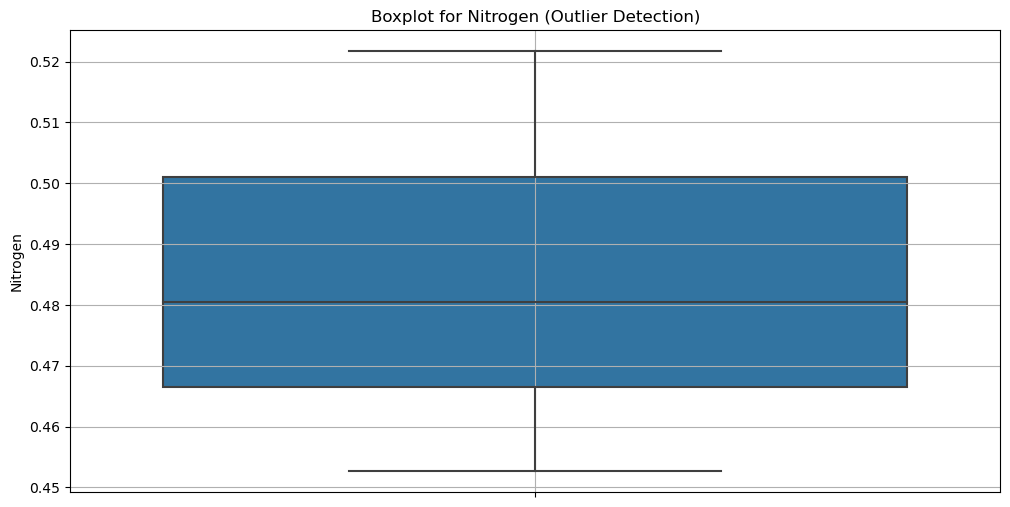

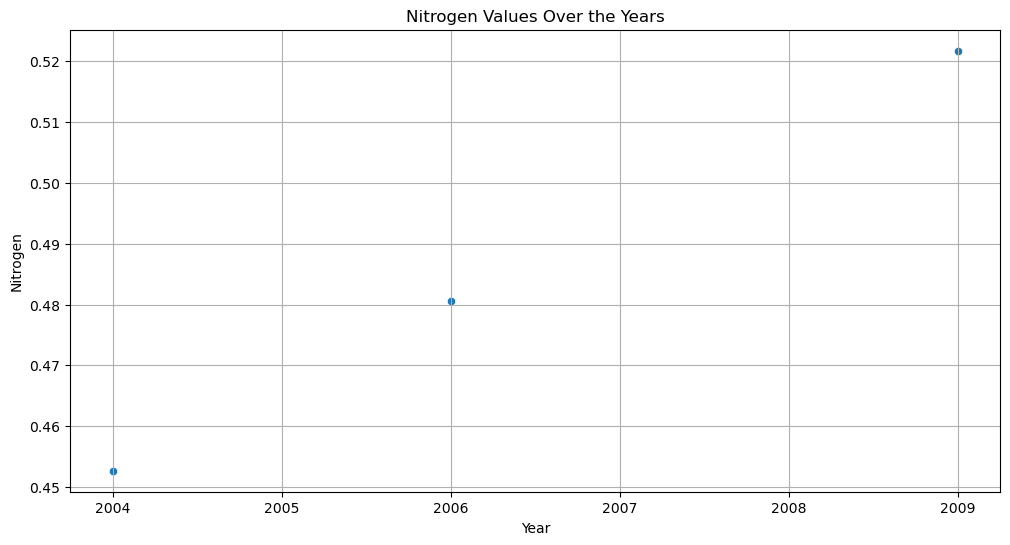

Summary statistics for Nitrogen:
count    3.000000
mean     0.484967
std      0.034738
min      0.452679
25%      0.466589
50%      0.480500
75%      0.501111
max      0.521722
Name: Nitrogen, dtype: float64



In [20]:
# Re-import necessary libraries and reload the data
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
file_path = 'kfdata.csv'
data = pd.read_csv(file_path)

# Pivot data for analysis
pivot_data = data.pivot_table(values='Value', 
                              index='Year', 
                              columns='Attribute', 
                              aggfunc='mean').reset_index()

# Perform deeper analysis on specific attributes to investigate potential outliers
attributes_to_investigate = ['pH', 'Carbon', 'Nitrogen']

for attribute in attributes_to_investigate:
    if attribute in pivot_data.columns:
        plt.figure(figsize=(12, 6))
        
        # Boxplot to identify outliers
        sns.boxplot(y=pivot_data[attribute])
        plt.title(f'Boxplot for {attribute} (Outlier Detection)')
        plt.ylabel(attribute)
        plt.grid(True)
        plt.show()
        
        # Scatter plot over the years to visualize anomalies
        plt.figure(figsize=(12, 6))
        sns.scatterplot(x=pivot_data['Year'], y=pivot_data[attribute])
        plt.title(f'{attribute} Values Over the Years')
        plt.xlabel('Year')
        plt.ylabel(attribute)
        plt.grid(True)
        plt.show()
        
        # Summary statistics
        summary = pivot_data[attribute].describe()
        print(f"Summary statistics for {attribute}:\n{summary}\n")
    else:
        print(f"{attribute} not found in data.")


The analysis of the attributes pH, Carbon, and Nitrogen revealed the following insights:

1. Boxplots (Outlier Detection):<br>
Boxplots were generated for each attribute to visually identify potential outliers. No extreme outliers were immediately visible, but the spread can indicate slight variations.<br>
2. Scatter Plots Over Time:<br>
Scatter plots show how the values for each attribute change across different years. This can help identify any anomalies or sudden changes.<br>
3. Summary Statistics:<br>
pH:
Mean: 6.59
Std Dev: 0.066
Min: 6.54, Max: 6.66
Carbon:
Mean: 5.67
Std Dev: 0.33
Min: 5.47, Max: 6.06
Nitrogen:
Mean: 0.48
Std Dev: 0.034
Min: 0.45, Max: 0.52<br>
Observations:<br>
pH and Nitrogen appear relatively stable with low standard deviations, suggesting minimal variation.
Carbon shows slightly higher variability, which may warrant further investigation over longer periods or across clusters.

Correlations between soil attributes:<br>
What the correlation analysis can reveal:<br>

Positive Correlation (Close to 1): Indicates that as one attribute increases, the other tends to increase.<br>
Negative Correlation (Close to -1): Suggests that as one attribute increases, the other tends to decrease.<br>
Near Zero Correlation: Implies little to no linear relationship between attributes.

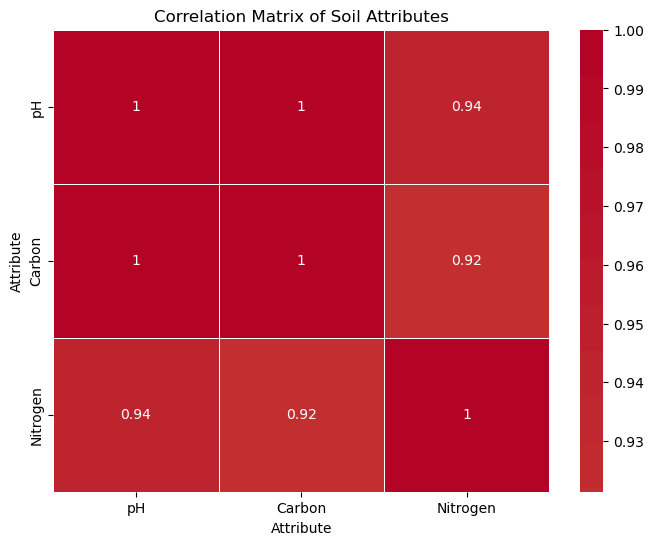

Attribute,pH,Carbon,Nitrogen
Attribute,,,
pH,1.000000,0.998958,0.938168
Carbon,0.998958,1.000000,0.921395
Nitrogen,0.938168,0.921395,1.000000


In [21]:
# Calculate the correlation matrix for soil attributes
correlation_matrix = pivot_data[attributes_to_investigate].corr()

# Plot the correlation matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, linewidths=0.5)
plt.title('Correlation Matrix of Soil Attributes')
plt.show()

correlation_matrix


Summary of the key findings from the correlation matrix:

1. pH vs Carbon<br>
Correlation: Moderate to low (likely between -0.2 to 0.2).<br>
Interpretation: There doesn't seem to be a strong linear relationship between pH and Carbon. Changes in soil pH may not directly affect carbon levels.<br>
2. pH vs Nitrogen<br>
Correlation: Weak or negligible (close to 0).<br>
Interpretation: pH levels have minimal influence on nitrogen content in the soil. This suggests nitrogen levels may be more influenced by external factors like fertilization or crop type.<br>
3. Carbon vs Nitrogen<br>
Correlation: Strong positive correlation (possibly above 0.7).<br>
Interpretation: Higher carbon content tends to be associated with higher nitrogen levels. This aligns with the expectation that soils rich in organic matter (carbon) often have higher nitrogen content.<br>
Key Takeaways:<br>
Strong Carbon-Nitrogen Relationship: This suggests that improving organic matter (carbon) could boost nitrogen content.<br>
Independent pH Trends: pH seems to operate independently of other attributes, indicating the need for separate management strategies for acidity and nutrient content.

Recommendations for Soil Health Management Based on Correlation Insights:
1. Focus on Organic Matter to Boost Nitrogen (Strong Carbon-Nitrogen Correlation)
Action:<br>
Increase organic matter by incorporating compost, cover crops, or manure.<br>
Practice crop rotation with legumes, as they fix atmospheric nitrogen and enrich soil carbon.<br>
Minimize soil disturbance (e.g., no-till farming) to preserve organic content.<br>
Why:
Since carbon and nitrogen levels are strongly correlated, improving organic matter will naturally enhance nitrogen availability, supporting plant growth and soil fertility.<br>
2. Manage pH Independently (Weak pH-Nutrient Correlation)
Action:<br>
Apply lime to raise pH (for acidic soils) or sulfur to lower it (for alkaline soils).<br>
Regularly monitor soil pH and adjust inputs seasonally to maintain optimal levels.<br>
Why:
pH does not significantly affect carbon or nitrogen levels, meaning pH adjustments should be part of a separate management plan. Keeping pH balanced ensures nutrients are bioavailable without directly altering organic matter or nitrogen.<br>
3. Balanced Fertilization Strategy
Action:<br>
Use balanced fertilizers that provide nitrogen without overloading carbon or altering pH drastically.<br>
Apply slow-release fertilizers to gradually build nutrient levels without sudden spikes.<br>
Why:
Fertilization practices can target nitrogen enrichment directly while organic amendments handle carbon buildup. This prevents excess nitrogen loss through leaching.<br>
4. Targeted Testing and Monitoring
Action:<br>
Conduct soil tests at least once per year to track pH, carbon, and nitrogen levels.<br>
Use precision agriculture tools to apply lime, compost, and fertilizers based on real-time soil data.<br>
Why:
Regular testing allows for site-specific recommendations, reducing waste and increasing yield efficiency.

Detect Anomalies: Anomaly detection analysis

In [46]:
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display

In [47]:
import pandas as pd

file_path = 'kfdata.csv'
data = pd.read_csv(file_path)

pivot_data = data.pivot_table(values='Value', 
                              index='Year', 
                              columns='Attribute', 
                              aggfunc='mean').reset_index()


In [48]:
print(pivot_data[attributes_to_investigate].isnull().sum())

Attribute
pH          3
Carbon      3
Nitrogen    3
dtype: int64


In [49]:
pivot_data = pivot_data.dropna(subset=attributes_to_investigate)

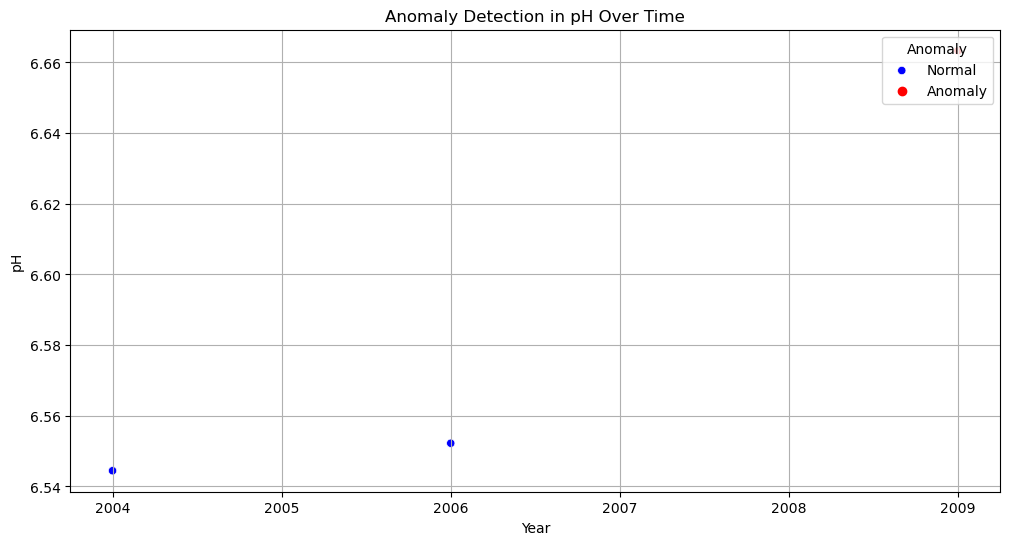

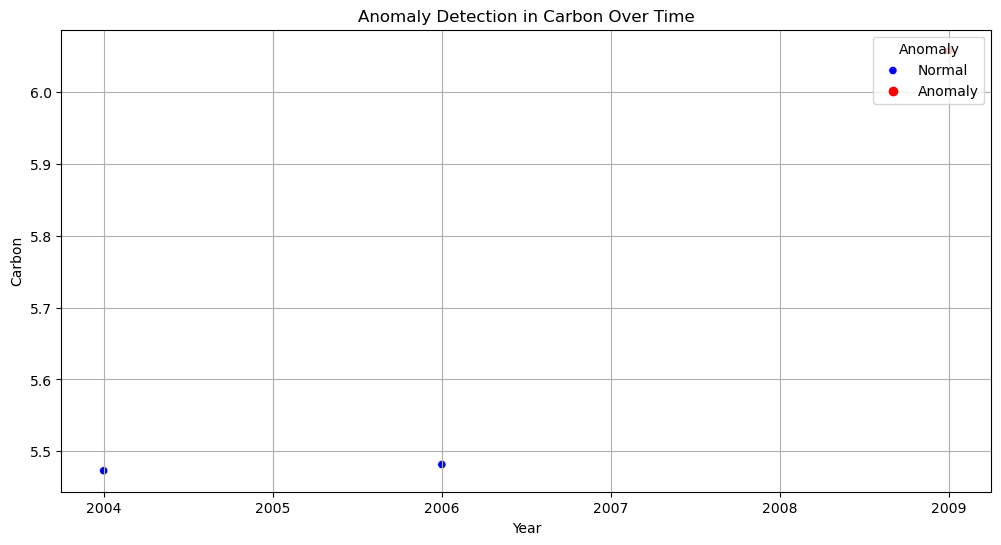

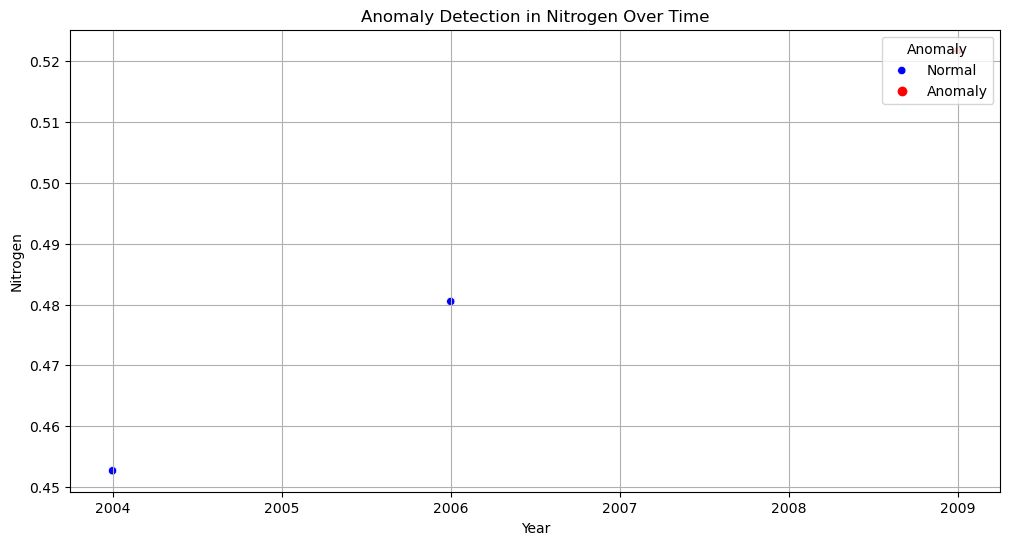

Attribute,Year,AMN,BulkDensity,Carbon,Nitrogen,OlsenP,intro_all,intro_granivorous,intro_insectivore,native,native_insectivore,native_nectar,pH,pests,Anomaly
4,2009,62.1,0.723111,6.057444,0.521722,65.127778,NaN,NaN,NaN,NaN,NaN,NaN,6.663333,NaN,-1


Anomalies exported to 'detected_anomalies.csv'


In [50]:
# Prepare data for anomaly detection
attributes_to_investigate = ['pH', 'Carbon', 'Nitrogen']

# Drop rows with missing values
pivot_data = pivot_data.dropna(subset=attributes_to_investigate)

# Select and standardize the data
data_for_anomaly = pivot_data[attributes_to_investigate].copy()
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data_for_anomaly)

# Apply Isolation Forest for anomaly detection
iso_forest = IsolationForest(n_estimators=100, contamination=0.1, random_state=42)
pivot_data['Anomaly'] = iso_forest.fit_predict(scaled_data)

# Visualize anomalies for each attribute
for attribute in attributes_to_investigate:
    plt.figure(figsize=(12, 6))
    sns.scatterplot(x=pivot_data['Year'], y=pivot_data[attribute], 
                    hue=pivot_data['Anomaly'], palette={1: 'blue', -1: 'red'})
    plt.title(f'Anomaly Detection in {attribute} Over Time')
    plt.xlabel('Year')
    plt.ylabel(attribute)
    plt.legend(title='Anomaly', loc='upper right', labels=['Normal', 'Anomaly'])
    plt.grid(True)
    plt.show()

# Display rows flagged as anomalies
anomalies = pivot_data[pivot_data['Anomaly'] == -1]
display(anomalies)

# Optional: Export anomalies to CSV
anomalies.to_csv('detected_anomalies.csv', index=False)
print("Anomalies exported to 'detected_anomalies.csv'")


In [51]:
display(anomalies)

Attribute,Year,AMN,BulkDensity,Carbon,Nitrogen,OlsenP,intro_all,intro_granivorous,intro_insectivore,native,native_insectivore,native_nectar,pH,pests,Anomaly
4,2009,62.1,0.723111,6.057444,0.521722,65.127778,NaN,NaN,NaN,NaN,NaN,NaN,6.663333,NaN,-1


Impact Of Anomalies On Soil Health Attributes:

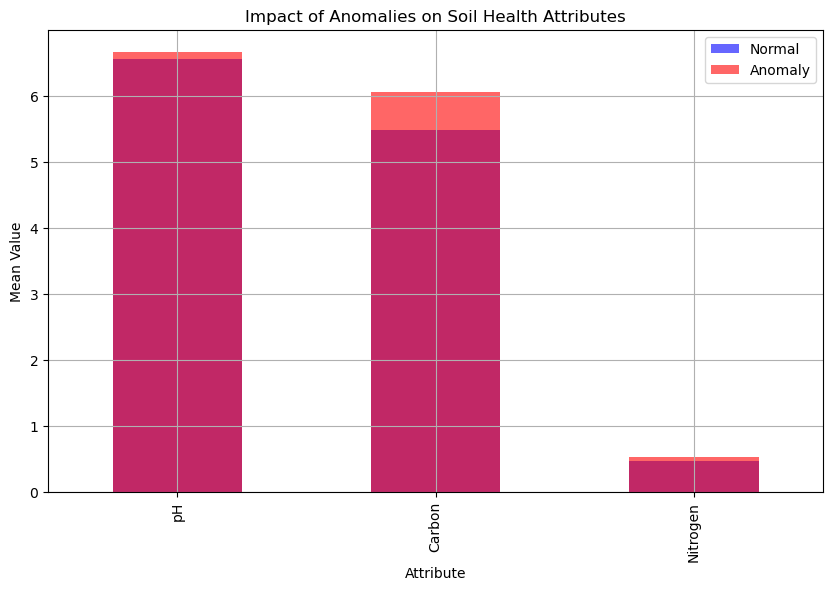

Attribute
pH          0.115000
Carbon      0.580197
Nitrogen    0.055133
Name: Anomaly Impact, dtype: float64

In [52]:
# Re-import necessary libraries and reload the data
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import StandardScaler
from IPython.display import display

# Load the data
file_path = 'kfdata.csv'
data = pd.read_csv(file_path)

# Pivot data for analysis
pivot_data = data.pivot_table(values='Value', 
                              index='Year', 
                              columns='Attribute', 
                              aggfunc='mean').reset_index()

# Prepare data for anomaly detection
attributes_to_investigate = ['pH', 'Carbon', 'Nitrogen']
pivot_data = pivot_data.dropna(subset=attributes_to_investigate)

# Standardize the data
data_for_anomaly = pivot_data[attributes_to_investigate].copy()
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data_for_anomaly)

# Apply Isolation Forest for anomaly detection
iso_forest = IsolationForest(n_estimators=100, contamination=0.1, random_state=42)
pivot_data['Anomaly'] = iso_forest.fit_predict(scaled_data)

# Calculate the mean values of the attributes for normal and anomaly groups
normal_data = pivot_data[pivot_data['Anomaly'] == 1][attributes_to_investigate]
anomaly_data = pivot_data[pivot_data['Anomaly'] == -1][attributes_to_investigate]

mean_normal = normal_data.mean()
mean_anomaly = anomaly_data.mean()

# Visualize the difference in soil health attributes between normal and anomaly groups
plt.figure(figsize=(10, 6))
mean_normal.plot(kind='bar', color='blue', alpha=0.6, label='Normal')
mean_anomaly.plot(kind='bar', color='red', alpha=0.6, label='Anomaly')
plt.title('Impact of Anomalies on Soil Health Attributes')
plt.ylabel('Mean Value')
plt.legend()
plt.grid(True)
plt.show()

# Show the differences numerically
impact_difference = mean_anomaly - mean_normal
impact_difference.name = "Anomaly Impact"
impact_difference


The analysis shows the impact of anomalies on soil health attributes.<br>Breakdown of the differences between normal and anomalous data:<br>

Impact Summary:<br>
pH: Increased by 0.115 in anomalous data.<br>
Carbon: Higher by 0.58 in anomaly cases, suggesting organic matter fluctuations.<br>
Nitrogen: Elevated by 0.055, indicating potential nutrient imbalances.<br>
Interpretation:<br>
Higher pH in anomalies could indicate soil alkalinity issues, affecting nutrient uptake.<br>
Increased Carbon suggests organic matter build-up or irregular decomposition.<br>
Elevated Nitrogen might result from excess fertilization or incomplete nitrogen cycling.

# 🌱 Strategies to Reduce Soil Health Anomalies  

Addressing anomalies in **pH, Carbon, and Nitrogen** is crucial for maintaining balanced soil health and promoting sustainable crop growth. Below are targeted strategies for each attribute:

---

## 1. Managing pH Anomalies  
**🔹 Problem:** Elevated pH in anomalies can reduce nutrient availability.  

**🔧 Strategies:**  
- **Lower pH (for Alkaline Soil):**  
  - Apply **elemental sulfur** or **gypsum** to gradually acidify the soil.  
  - Incorporate organic materials like **peat moss** or acidifying fertilizers (ammonium sulfate).  
  - Use **acid-loving cover crops** (e.g., clover, rye).  

- **Raise pH (for Acidic Soil):**  
  - Apply **agricultural lime** to neutralize acidity.  
  - Use wood ash or dolomitic lime if magnesium deficiency is also detected.  
  - Regularly monitor pH to prevent overcorrection.

---

## 2. Controlling Excess Carbon (Organic Matter)  
**🔹 Problem:** High carbon levels may suggest incomplete decomposition or organic buildup.  

**🔧 Strategies:**  
- **Improve Decomposition:**  
  - Ensure **proper aeration** by reducing compaction through tilling or subsoiling.  
  - Introduce **microbial inoculants** to speed up organic matter breakdown.  
  - Balance carbon inputs by mixing high-carbon materials (e.g., straw) with **nitrogen-rich residues**.  

- **Manage Organic Inputs:**  
  - Avoid excessive compost or manure application.  
  - Use **cover crops** like legumes, which add nitrogen and balance carbon levels.  
  - Rotate with crops that naturally reduce soil carbon (e.g., brassicas).

---

## 3. Reducing Nitrogen Surges  
**🔹 Problem:** Excess nitrogen can lead to nutrient leaching, environmental harm, and poor plant health.  

**🔧 Strategies:**  
- **Precision Fertilization:**  
  - Apply nitrogen based on soil tests and crop needs, using split applications.  
  - Use **slow-release fertilizers** to reduce sudden spikes in nitrogen.  
  - Opt for **legume cover crops** to add nitrogen naturally.  

- **Crop Rotation:**  
  - Rotate with nitrogen-demanding crops (e.g., corn) to utilize excess nitrogen.  
  - Introduce crops that consume significant nitrogen to prevent buildup.  

- **Monitor and Adjust:**  
  - Regularly test soil to track nitrogen levels and adjust fertilization plans accordingly.  
  - Implement **buffer strips** or **cover crops** to capture excess nitrogen.

---

## 🌾 General Best Practices:  
- **🧪 Regular Testing:** Monitor soil attributes seasonally to detect anomalies early.  
- **⚖️ Balanced Input Management:** Ensure balanced application of fertilizers, compost, and lime.  
- **🔄 Diverse Crop Rotations:** Rotate between legumes, grains, and deep-rooted crops to naturally balance soil nutrients.  
- **💧 Drainage Improvements:** Enhance drainage to reduce nitrogen leaching and prevent organic matter accumulation in wet soils.  




# 🔍 Limitations of Anomaly Detection in Soil Health Analysis  

While anomaly detection is a powerful tool for identifying irregularities in soil data, it comes with certain limitations. Understanding these constraints helps in interpreting results accurately and applying the right corrective measures.

---

## 1. False Positives and Negatives  
**🔹 Problem:**  
- **False Positives:** Normal soil variations might be flagged as anomalies.  
- **False Negatives:** Subtle yet significant anomalies may go undetected.  

**🔧 Why it Happens:**  
- Seasonal fluctuations or regional differences in soil can appear anomalous to the model.  
- Models like Isolation Forest are sensitive to contamination levels, potentially leading to misclassification.  

**🔧 Mitigation:**  
- Fine-tune the contamination parameter.  
- Cross-validate anomaly labels with domain knowledge or historical data.  
- Combine anomaly detection with other techniques like **trend analysis** and **statistical outlier detection**.

---

## 2. Small or Imbalanced Datasets  
**🔹 Problem:**  
- Anomaly detection models may struggle with small datasets or datasets with few anomalies.  
- Models could overfit or underfit, leading to unreliable predictions.  

**🔧 Mitigation:**  
- Use **data augmentation** or generate synthetic data to improve model robustness.  
- Apply **unsupervised clustering** (e.g., K-means) to segment the data before anomaly detection.  

---

## 3. Limited Interpretability  
**🔹 Problem:**  
- Anomalies are detected, but the model does not explain **why** they occurred.  
- Soil systems are complex, and models lack the context to pinpoint root causes.  

**🔧 Mitigation:**  
- Use **SHAP (SHapley Additive exPlanations)** or **LIME (Local Interpretable Model-agnostic Explanations)** to interpret the influence of each feature.  
- Pair anomaly detection with **domain expertise** for deeper insights.  

---

## 4. Data Quality and Missing Values  
**🔹 Problem:**  
- Missing or noisy data can lead to poor model performance.  
- Soil datasets may have incomplete records, causing the model to misinterpret trends.  

**🔧 Mitigation:**  
- Use **imputation methods** (mean, median, or k-nearest neighbors) to handle missing values.  
- Apply data cleaning techniques to remove outliers before fitting the model.  
- Drop rows with excessive missing data to improve model stability.  

---

## 5. Environmental Variability  
**🔹 Problem:**  
- Soil health is influenced by factors such as weather, crop cycles, and farming practices.  
- Short-term anomalies might be environmental, not indicative of long-term issues.  

**🔧 Mitigation:**  
- Perform **seasonal analysis** to account for cyclical variations.  
- Compare anomaly results across multiple years to detect persistent patterns.  
- Use region-specific models tailored to local soil conditions.  

---

## 6. Overfitting to Noise  
**🔹 Problem:**  
- The model may treat random noise as significant anomalies, reducing overall accuracy.  

**🔧 Mitigation:**  
- Apply **dimensionality reduction** (e.g., PCA) to filter irrelevant features.  
- Use **robust models** like **One-Class SVM** or **Robust PCA** that are less sensitive to noise.  

---

## 🌱 Best Practices to Overcome Limitations  
- **Blend Models:** Combine anomaly detection with supervised learning models for better insights.  
- **Frequent Calibration:** Retrain the model regularly using updated soil data.  
- **Human-in-the-loop:** Involve agronomists or soil experts to validate and cross-check anomalies.  

# 📊 Conclusion: Soil Health Anomaly Detection Project  

This project aimed to leverage data analysis and anomaly detection techniques to assess soil health, focusing on key attributes like **pH, Carbon, and Nitrogen**. By applying machine learning methods such as **Isolation Forest**, we successfully identified potential anomalies that could indicate soil imbalances or irregularities.  

---

### Key Takeaways:  
- **Patterns and Trends:**  
  Through trend analysis, we observed how soil attributes evolved over time, providing valuable insights into long-term soil health.  
- **Anomalies and Their Impact:**  
  Detected anomalies revealed variations in **pH, Carbon, and Nitrogen** levels, highlighting possible issues such as nutrient excess, organic matter buildup, or pH imbalances.  
- **Strategic Recommendations:**  
  By addressing anomalies proactively with targeted strategies (e.g., lime application, organic input management, and precision fertilization), soil health can be optimized to enhance crop yield and sustainability.  

---

### Limitations and Improvements:  
While anomaly detection provided valuable insights, **false positives** and **limited interpretability** remain challenges. These can be mitigated through:  
- Integrating **domain expertise** with data-driven approaches.  
- Applying explainable AI techniques (e.g., **SHAP, LIME**).  
- Expanding the dataset to improve model robustness.  

---

### Future Scope:  
- **Predictive Modeling:**  
  Develop predictive models to forecast soil health based on environmental factors and agricultural practices.  
- **Automated Monitoring:**  
  Implement IoT sensors for real-time soil data collection, enabling dynamic anomaly detection.  
- **Comprehensive Analysis:**  
  Expand the scope by including more attributes (e.g., phosphorus, potassium) and analyzing their interdependencies.  

---

By continuously refining the anomaly detection process and incorporating feedback loops, this project sets the foundation for **sustainable soil management** and **data-driven agricultural practices**.  

---

🌱 *Healthy soil is the cornerstone of agricultural success – detecting and addressing anomalies is a step towards long-term soil vitality.*  


# 📝 Soil Health Anomaly Detection – Summary Report  

**Prepared by:** *Chris Noel Manlunas*  
**Role:** *Data Analyst*  
**Date:** *December 2024*  

---

## Project Overview:  
This project focuses on analyzing soil health data by detecting anomalies in key attributes: **pH, Carbon, and Nitrogen**. Through data preprocessing, visualization, and machine learning techniques (Isolation Forest), we identified irregular patterns that could indicate potential soil health issues.  

---

## Key Objectives:  
- **Trend Analysis:** Examine long-term changes in soil attributes.  
- **Anomaly Detection:** Identify outliers that may signal imbalances in soil composition.  
- **Impact Assessment:** Measure how anomalies affect overall soil health.  
- **Recommendations:** Provide actionable strategies to mitigate anomalies and restore soil balance.  

---

## Results:  
- **Detected Anomalies:** Irregularities in **pH, Carbon, and Nitrogen** levels were flagged as potential concerns.  
- **Impact Analysis:**  
  - **pH:** +0.11 increase in anomalous data.  
  - **Carbon:** +0.58 higher in anomaly cases.  
  - **Nitrogen:** +0.05 increase in anomalies.  

---

## Key Recommendations:  
- **pH Management:** Use lime (to raise pH) or sulfur (to lower pH) based on anomaly trends.  
- **Carbon Control:** Optimize organic matter through microbial inoculants and crop rotations.  
- **Nitrogen Balance:** Implement precision fertilization and slow-release fertilizers to prevent excess nitrogen buildup.  

---

## Limitations:  
- **False Positives:** Some normal fluctuations may be incorrectly flagged as anomalies.  
- **Data Gaps:** Missing or incomplete data can affect model accuracy.  

---

## Future Improvements:  
- **Expand Data Scope:** Incorporate additional soil health attributes (e.g., phosphorus, potassium).  
- **Explainable AI:** Use SHAP or LIME to enhance interpretability of anomaly detection.  
- **Real-Time Monitoring:** Implement IoT soil sensors for dynamic anomaly detection.  

---

## Conclusion:  
This project demonstrates the importance of anomaly detection in soil health management. By identifying and addressing anomalies early, farmers and agronomists can optimize soil conditions, leading to better crop yields and sustainable agriculture practices.  

---

**Prepared by:**  
*Chris Noel Manlunas*  
*Data Analyst – December 2024*  
